# Napari image viewer

Uses the octopuslite dask image loader to automatically sort and load images from multichannel time lapse experiments. Can also use btrack to load associated tracks and segmentation images.

In [1]:
import napari
from octopuslite import DaskOctopusLiteLoader
import glob
import numpy as np

# Load images

In [2]:
# define experiment ID and select a position
expt = 'ND0013'
pos = 'Pos3'
# point to where the data is
root_dir = '/home/nathan/data/kraken/ras'
image_path = f'{root_dir}/{expt}/{pos}/{pos}_images'
transform_paths = glob.glob(f'{root_dir}/{expt}/{pos}/*.npy')
print(transform_paths)
tracks_path = f'{root_dir}/{expt}/{pos}/tracks.h5'

[]


In [3]:
transform_path = transform_paths[0] #'/home/nathan/data/kraken/ras/ND0019/Pos2/mask_reversed_clipped_transform_tensor.npy'

IndexError: list index out of range

In [6]:
# lazily load images
images = DaskOctopusLiteLoader(image_path,
                            #  transforms = transform_path,
                              crop = (1200,1600),
                              remove_background = True)
                              
images.channels

Using cropping: (1200, 1600)


[<Channels.BRIGHTFIELD: 0>,
 <Channels.GFP: 1>,
 <Channels.RFP: 2>,
 <Channels.IRFP: 3>]

In [8]:
gfp = images['gfp']
rfp = images['rfp']
# irfp = images['irfp']
#masks = images['mask']

### Add tracks

In [ ]:
import btrack
from btrack.utils import tracks_to_napari

#### GFP tracks

In [ ]:
with btrack.dataio.HDF5FileHandler(tracks_path, 
                                   'r', obj_type='obj_type_1'
                                  ) as h:
    gfp_tracks = h.tracks

In [ ]:
gfp_tracks, gfp_properties, gfp_graph = tracks_to_napari(gfp_tracks, ndim = 2)

#### RFP tracks

In [ ]:
with btrack.dataio.HDF5FileHandler(tracks_path, 
                                   'r', obj_type='obj_type_2'
                                  ) as h:
    rfp_tracks = h.tracks

In [ ]:
rfp_tracks, rfp_properties, rfp_graph = tracks_to_napari(rfp_tracks, ndim = 2)

# Launch viewer

In [15]:
len(gfp)

2797

In [9]:
N = len(gfp) ## number of frames to load

In [10]:
viewer = napari.Viewer()
viewer.add_image(gfp[0:N].astype(np.uint8), name="gfp", 
                 contrast_limits=[0,255],
                 blending = 'additive', colormap = 'green')#, is_pyramid=False)
viewer.add_image(rfp[0:N].astype(np.uint8), name="rfp", 
                 contrast_limits=[0,55], 
                 blending = 'additive', colormap = 'magenta')#, is_pyramid=False)
# viewer.add_image(irfp[0:N].astype(np.uint8), name="irfp", 
#                  contrast_limits=[0,255], 
#                  blending = 'additive', colormap = 'cyan')#
#viewer.add_labels(masks[0:N].astype(np.uint8), name = 'masks',
#               blending = 'additive',)
# viewer.add_labels(images['mask'].astype(np.uint8), name = 'masks original',
#                blending = 'additive',)
# viewer.add_tracks(gfp_tracks)
# viewer.add_tracks(rfp_tracks)

Assistant skips harvesting pyclesperanto as it's not installed.


__init__.py (165): Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.


<Image layer 'rfp' at 0x7f7b7b754df0>

keyframeslist_widget.py (156): Themes were changed to use evented model with Pydantic's color type rather than the `rgb(x, y, z)`. The `as_dict=True` option will be changed to `as_dict=False` in 0.4.15
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarr

Rendering frame  1 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1104, 902) to (1104, 912) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Rendering frame  2 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  3 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  4 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  5 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  6 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  7 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  8 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  9 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  10 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  11 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  12 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  13 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  14 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  15 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  16 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  17 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  18 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  19 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  20 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  21 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  22 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  23 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  24 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  25 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  26 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  27 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  28 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  29 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  30 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  31 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  32 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  33 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  34 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  35 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  36 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  37 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  38 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  39 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  40 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  41 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  42 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  43 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  44 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  45 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  46 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  47 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  48 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  49 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  50 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  51 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  52 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  53 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  54 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  55 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  56 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  57 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  58 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  59 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  60 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  61 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  62 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  63 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  64 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  65 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  66 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  67 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  68 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  69 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  70 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  71 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  72 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  73 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  74 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  75 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  76 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  77 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  78 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  79 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  80 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  81 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  82 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  83 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  84 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  85 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  86 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  87 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  88 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  89 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  90 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  91 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  92 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  93 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  94 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  95 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  96 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  97 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  98 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  99 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarr

Rendering frame  100 of 199
Rendering frame  101 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  102 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  103 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  104 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  105 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  106 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  107 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  108 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  109 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  110 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  111 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  112 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  113 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  114 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  115 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  116 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  117 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  118 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  119 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  120 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  121 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  122 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  123 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  124 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  125 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  126 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  127 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  128 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  129 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  130 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  131 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  132 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  133 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  134 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  135 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  136 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  137 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  138 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  139 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  140 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  141 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  142 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  143 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  144 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  145 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  146 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  147 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  148 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  149 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  150 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  151 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  152 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  153 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  154 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  155 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  156 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  157 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  158 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  159 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  160 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  161 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  162 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  163 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  164 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  165 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  166 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  167 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  168 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  169 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  170 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  171 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  172 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  173 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  174 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  175 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  176 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  177 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  178 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  179 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  180 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  181 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  182 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  183 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  184 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  185 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  186 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  187 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  188 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  189 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  190 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  191 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  192 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  193 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  194 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  195 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  196 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  197 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  198 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  199 of 199


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


In [22]:
from skimage.io import imshow
%matplotlib inline

In [23]:
mask = masks[3]

In [24]:
from skimage import transform as tf

In [25]:
mask.shape

(1200, 1600)

In [26]:
tf.matrix_transform(mask)

TypeError: matrix_transform() missing 1 required positional argument: 'matrix'

In [27]:
tmats = np.load(transform_path)

In [28]:
tmat = tmats[3]

In [29]:
tmat

array([[ 1.        ,  0.        ,  0.70938308],
       [ 0.        ,  1.        , -1.2731654 ],
       [ 0.        ,  0.        ,  1.        ]])

In [30]:
tmat.astype(int)

array([[ 1,  0,  0],
       [ 0,  1, -1],
       [ 0,  0,  1]])

matplotlib_plugin.py (150): Float image out of standard range; displaying image with stretched contrast.


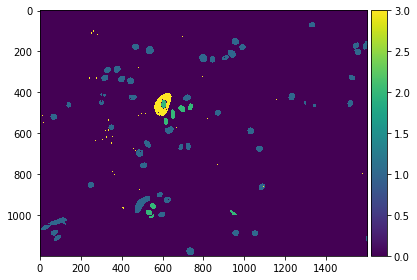

In [31]:
imshow(masks[0])

In [32]:
from skimage.io import imread
import skimage.transform as tf
import re
from tqdm.auto import tqdm

In [ ]:
files = images.files('gfp')

In [ ]:
stack_gfp = []

for i in tqdm(files, total = len(files)):
  #  print(f'{idx}/{len(files)}')
    img_gfp = imread(i)
    #img_rfp = imread(i.replace('channel001', 'channel002'))
#     tform = tf.AffineTransform(translation=transform_tensor[idx, :2, 2])
#     img_gfp = tf.warp(img_gfp, tform, preserve_range=True)
    #img_rfp = tf.warp(img_rfp, tform, preserve_range=True)
    
#     img_gfp = img_gfp#[crops]
    #img_rfp = img_rfp[crops]
    stack_gfp.append(img_gfp)
    #stack_rfp.append(img_rfp)
stack_gfp = np.stack(stack_gfp, axis = 0)
#stack_rfp = np.dstack(stack_rfp)

In [ ]:
stack_rfp = []

for i in tqdm(files, total = len(files)):
#     print(f'{idx}/{len(files)}')
    #img_gfp = imread(i)
    img_rfp = imread(i.replace('channel001', 'channel002'))
#     tform = tf.AffineTransform(translation=transform_tensor[idx, :2, 2])
#     img_gfp = tf.warp(img_gfp, tform, preserve_range=True)
    #img_rfp = tf.warp(img_rfp, tform, preserve_range=True)
    
#     img_gfp = img_gfp[crops]
#    img_rfp = img_rfp[crops]
    #stack_gfp.append(img_gfp)
    stack_rfp.append(img_rfp)
#stack_gfp = np.dstack(stack_gfp)
stack_rfp = np.stack(stack_rfp, axis = 0)

In [ ]:
viewer = napari.Viewer()

viewer.add_image(stack_gfp, name="gfp", 
                 contrast_limits=[0,255],
                 blending = 'additive', colormap = 'green')
viewer.add_image(stack_rfp, name="rfp", 
                 contrast_limits=[0,55], 
                 blending = 'additive', colormap = 'magenta')

In [ ]:
crop = (1200,1600)

In [ ]:
transform_tensor = np.load(transform_path)
img = imread(files[0])
shape = img.shape
dims = img.ndim
cslice = lambda d: slice(
    int((shape[d] - crop[d]) // 2), int((shape[d] - crop[d]) // 2 + crop[d])
)
crops = tuple([cslice(d) for d in range(dims)])

# Should i stack 2ch image?

In [ ]:
stack = []
img = np.zeros((imread(files[0]).shape[0], imread(files[0]).shape[1], 2 ))

for i in tqdm((files), total = len(files)):
    img_gfp = imread(i)
    img_rfp = imread(i.replace('channel001', 'channel002'))
#     tform = tf.AffineTransform(translation=transform_tensor[idx, :2, 2])
#     img_gfp = tf.warp(img_gfp, tform, preserve_range=True)
#     img_rfp = tf.warp(img_rfp, tform, preserve_range=True)
    
    img[:,:,0] = img_gfp
    img[:,:,1] = img_rfp
    stack.append(img)
stack = np.dstack(stack)

In [ ]:
end = time.time()

print(end-start)

In [ ]:
img

In [ ]:
viewer = napari.Viewer()

viewer.add_image(stack)

# Ras mask tidier

In [33]:
masks[0]

dask.array<getitem, shape=(1200, 1600), dtype=float32, chunksize=(1200, 1600), chunktype=numpy.ndarray>

In [34]:
masks[0]

dask.array<getitem, shape=(1200, 1600), dtype=float32, chunksize=(1200, 1600), chunktype=numpy.ndarray>

In [35]:
from scipy.ndimage import label

In [36]:
from scipy.ndimage import gaussian_filter

In [37]:
from scipy.ndimage import binary_erosion

In [38]:
from skimage.io import imshow
%matplotlib inline

matplotlib_plugin.py (150): Float image out of standard range; displaying image with stretched contrast.


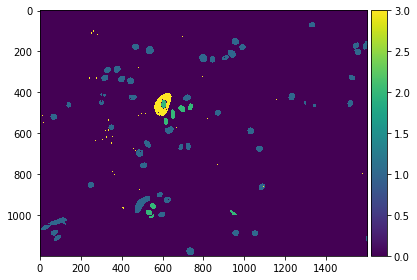

In [39]:
imshow(masks[0])

In [40]:
label(masks[0])[-1]

232

matplotlib_plugin.py (150): Float image out of standard range; displaying image with stretched contrast.


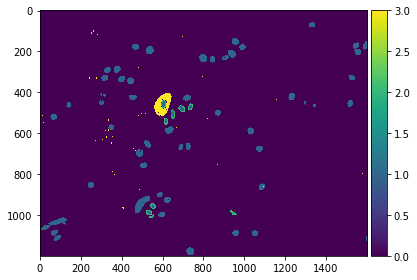

In [41]:
imshow(masks[0]-gaussian_filter(masks[0]==2, sigma = 1))

matplotlib_plugin.py (150): Low image data range; displaying image with stretched contrast.


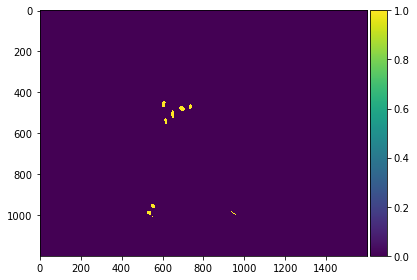

In [42]:
imshow((binary_erosion((masks[0]==2), iterations = 4)).astype(int))

matplotlib_plugin.py (150): Float image out of standard range; displaying image with stretched contrast.


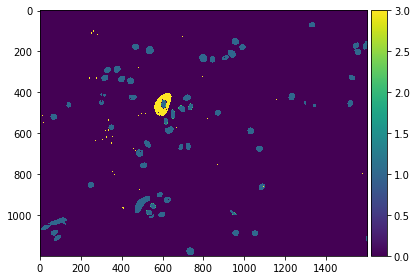

In [43]:
imshow(masks[0]-binary_erosion(masks[0]==2, iterations = 1))

In [44]:
from skimage import measure

In [46]:
area = []
for i in range(287):
    area.append(measure.regionprops(label(masks[0])[0])[i]['area'])

IndexError: list index out of range

In [53]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(area)

# iRFP masks

Generating statistics about upper and lower bounds for area and ellipsivity of definitive GFP segments (found by iRFP segmentation)

ND0022 Pos12

In [47]:
irfp_masks = DaskOctopusLiteLoader('/home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/')['mask_irfp']

In [48]:
from tqdm.auto import tqdm

In [49]:
mask = (label(irfp_masks[282])[0])

matplotlib_plugin.py (150): Low image data range; displaying image with stretched contrast.


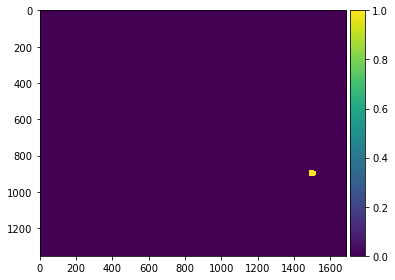

In [50]:
imshow((mask==169).astype(int))

In [51]:
props = [] # list of image region props
area_dist = []
ecc_dist = []
for mask in tqdm(irfp_masks):
    mask_props = measure.regionprops(label(mask)[0])
    #props.append(mask_props)
    for segment in mask_props:
        area_dist.append(segment.area)
        ecc_dist.append(segment.eccentricity)

  0%|          | 0/1098 [00:00<?, ?it/s]

(array([1.7000e+01, 1.5770e+03, 4.2860e+03, 3.1940e+03, 2.0070e+03,
        1.5220e+03, 1.5010e+03, 1.1960e+03, 1.2700e+03, 1.2730e+03,
        1.3480e+03, 1.4360e+03, 1.5840e+03, 1.7810e+03, 1.9950e+03,
        2.3780e+03, 2.9130e+03, 3.5860e+03, 4.5930e+03, 5.5700e+03,
        6.7850e+03, 7.2440e+03, 7.8390e+03, 8.3830e+03, 9.2730e+03,
        9.7340e+03, 1.0392e+04, 1.0899e+04, 1.1307e+04, 1.0992e+04,
        1.1554e+04, 1.2005e+04, 1.2458e+04, 1.1370e+04, 1.0383e+04,
        1.0062e+04, 9.8840e+03, 9.0050e+03, 8.4170e+03, 7.9740e+03,
        7.9760e+03, 7.2380e+03, 6.7050e+03, 6.2910e+03, 6.1850e+03,
        5.6900e+03, 5.6320e+03, 5.3110e+03, 5.2010e+03, 5.0250e+03,
        4.5680e+03, 4.4230e+03, 4.3270e+03, 3.7280e+03, 3.4750e+03,
        3.1420e+03, 2.9960e+03, 2.5590e+03, 2.2110e+03, 1.9400e+03,
        1.8700e+03, 1.7010e+03, 1.5830e+03, 1.5820e+03, 1.4790e+03,
        1.3880e+03, 1.2360e+03, 1.2560e+03, 1.0920e+03, 1.0110e+03,
        9.8500e+02, 8.6400e+02, 8.1800e+02, 6.89

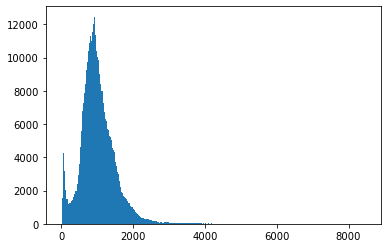

In [54]:
plt.hist(area_dist, bins = 300)

([<matplotlib.axis.XTick at 0x7f8bb39d3bb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

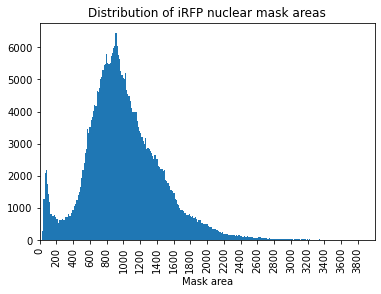

In [70]:
plt.hist(area_dist, bins = 600,)
plt.xlim(0,4000)
plt.title('Distribution of iRFP nuclear mask areas')
plt.xlabel('Mask area')
plt.xticks([i for i in range(0,4000, 200)], rotation = 'vertical')

([<matplotlib.axis.XTick at 0x7f8bb86772e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

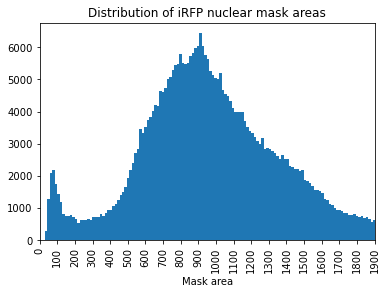

In [68]:
plt.hist(area_dist, bins = 600,)
plt.xlim(0,1000)
plt.title('Distribution of iRFP nuclear mask areas')
plt.xlabel('Mask area')
plt.xticks([i for i in range(0,2000, 100)], rotation = 'vertical')

In [56]:
np.std(area_dist)

490.2299756669125

Text(0.5, 0, 'Eccentricity')

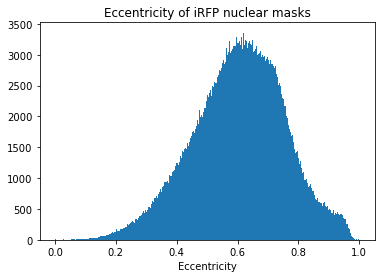

In [71]:
plt.hist(ecc_dist, bins = 300)
plt.title('Eccentricity of iRFP nuclear masks')
plt.xlabel('Eccentricity')

In [58]:
np.std(ecc_dist)

0.150951598884306

In [59]:
import pandas as pd

In [60]:
area_df = pd.DataFrame(area_dist)
ecc_df = pd.DataFrame(ecc_dist)

In [61]:
area_df.quantile(0.98)

0    2190.0
Name: 0.98, dtype: float64

In [62]:
area_df.quantile(0.02)

0    96.0
Name: 0.02, dtype: float64

Check irfp masks

In [ ]:
irfp_ = DaskOctopusLiteLoader('/home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/')['irfp']
gfp_ = DaskOctopusLiteLoader('/home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/')['gfp']

In [ ]:
viewer = napari.Viewer()
viewer.add_image(irfp_.astype(np.uint8), name="irfp", 
                 contrast_limits=[0,255],
                 blending = 'additive', colormap = 'red')
viewer.add_image(gfp_.astype(np.uint8), name="gfp", 
                 contrast_limits=[0,255],
                 blending = 'additive', colormap = 'green')#, is_pyramid=False)
viewer.add_labels(irfp_masks.astype(np.uint16), name = 'masks',
               blending = 'additive',)
